# THE CARBON FOOTPRINT DATASET
This dataset contains 10,000 entries with 20 columns related to an individual's lifestyle, habits, and consumption patterns, aiming to estimate carbon footprint (measured in the CarbonEmission column). It covers various factors like transportation choices, diet, waste production, and energy usage, which influence carbon emissions.

This dataset provides a comprehensive view of how individual lifestyle choices impact carbon footprint, making it well-suited for prediction models and sustainability recommendations.
The dataset can be used for a Carbon Footprint Estimation & Reduction Advisor, helping individuals make sustainable lifestyle choices.

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.svm import SVR

## LOAD THE DATASET

In [2]:
df = pd.read_csv("Carbon Emission.csv")

# EDA

In [3]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


### FEATURES
1. Body Type - Categorizes individuals as underweight, normal, overweight, or obese.
2. Sex - Indicates the gender of the individual (male/female).
3. Diet - Specifies dietary habits: vegetarian, vegan, omnivore, pescatarian.
4. How Often Shower - Frequency of showers (daily, twice a day, more frequently, less frequently).
5. Heating Energy Source - Type of energy used for heating (coal, wood, natural gas, etc.).
6. Transport - Primary mode of transportation (public, private, walk/bicycle).
7. Vehicle Type - If applicable, specifies the fuel type of private vehicles (petrol, diesel, electric). (Has many missing values).
8. Social Activity - Frequency of social outings (often, sometimes, never).
9. Monthly Grocery Bill - The individual's monthly spending on groceries (in currency).
10. Frequency of Traveling by Air - Indicates air travel frequency (never, rarely, frequently, very frequently).
11. Vehicle Monthly Distance Km - Total distance traveled in a private vehicle per month (in km).
12. Waste Bag Size - Size of the waste bags used (small, medium, large, extra large).
13. Waste Bag Weekly Count - The number of waste bags generated per week.
14. How Long TV PC Daily Hour - Daily screen time on TV/PC (in hours).
15. How Many New Clothes Monthly - Number of new clothes purchased per month.
16. How Long Internet Daily Hour - Internet usage in hours per day.
17. Energy Efficiency - Whether the individual follows energy-efficient practices (Yes, No, Sometimes).
18. Recycling - Types of waste recycled (Metal, Paper, Plastic, Glass, stored as a list).
19. Cooking_With - Appliances used for cooking (Oven, Stove, Microwave, Grill, Airfryer, stored as a list).

## FEATURE ENGINEERING

In [9]:
df['CarbonEmission'].max(),df['CarbonEmission'].min(),df['CarbonEmission'].mean(),df['CarbonEmission'].median(),

(8377, 306, 2269.1473, 2080.0)

In [4]:
df['Transport'].unique()

array(['public', 'walk/bicycle', 'private'], dtype=object)

In [5]:
df = pd.get_dummies(df, columns=['Sex','Energy efficiency'])

In [6]:
df

,Body Type,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,...,How Many New Clothes Monthly,How Long Internet Daily Hour,Recycling,Cooking_With,CarbonEmission,Sex_female,Sex_male,Energy efficiency_No,Energy efficiency_Sometimes,Energy efficiency_Yes
0,overweight,pescatarian,daily,coal,public,NaN,often,230,frequently,210,...,26,1,['Metal'],"['Stove', 'Oven']",2238,True,False,True,False,False
1,obese,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,...,38,5,['Metal'],"['Stove', 'Microwave']",1892,True,False,True,False,False
2,overweight,omnivore,more frequently,wood,private,petrol,never,138,never,2472,...,47,6,['Metal'],"['Oven', 'Microwave']",2595,False,True,False,True,False
3,overweight,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,...,5,7,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,False,True,False,True,False
4,obese,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,...,5,6,['Paper'],['Oven'],4743,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,...,27,9,[],['Microwave'],2408,False,True,False,False,True
9996,normal,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,...,8,24,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084,True,False,False,True,False
9997,overweight,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,...,5,24,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377,True,False,False,False,True
9998,underweight,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,...,14,5,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574,False,True,False,True,False


In [7]:
body_type_mapping = {'underweight': 0, 'normal': 1, 'overweight': 2, 'obese': 3}
df['Body Type'] = df['Body Type'].map(body_type_mapping)

diet_mapping = {'vegan': 0, 'vegetarian': 1, 'pescatarian': 2, 'omnivore': 3}
df['Diet'] = df['Diet'].map(diet_mapping)

shower_mapping = {
    'less frequently': 0, 
    'daily': 1, 
    'twice a day': 2, 
    'more frequently': 3
}
df['How Often Shower'] = df['How Often Shower'].map(shower_mapping)

heating_source_mapping = {
    'coal': 3, 
    'wood': 2, 
    'natural gas': 1, 
    'electricity': 0
}
df['Heating Energy Source'] = df['Heating Energy Source'].map(heating_source_mapping)

transport_mapping = {'private':2,'public':1,'walk/bicycle':0}
df['Transport'] = df['Transport'].map(transport_mapping)

activity_mapping = {'often':2,'sometimes':1,'never':0}
df['Social Activity'] = df['Social Activity'].map(activity_mapping)

air_travel_mapping = {'very frequently':3,'frequently':2,'rarely':1,'never':0}
df['Frequency of Traveling by Air'] = df['Frequency of Traveling by Air'].map(air_travel_mapping)

bag_size_mapping = {'extra large':3,'large':2,'medium':1,'small':0}
df['Waste Bag Size'] = df['Waste Bag Size'].map(bag_size_mapping)

In [8]:
df['Cooking_Oven'] = df['Cooking_With'].apply(lambda x: 'Oven' in x)
df['Cooking_Microwave'] = df['Cooking_With'].apply(lambda x: 'Microwave' in x)
df['Cooking_Grill'] = df['Cooking_With'].apply(lambda x: 'Grill' in x)
df['Cooking_Airfryer'] = df['Cooking_With'].apply(lambda x: 'Airfryer' in x)
df['Cooking_Stove'] = df['Cooking_With'].apply(lambda x: 'Stove' in x)

In [9]:
df['Recycling_Metal'] = df['Recycling'].apply(lambda x: 'Metal' in x)
df['Recycling_Paper'] = df['Recycling'].apply(lambda x: 'Paper' in x)
df['Recycling_Glass'] = df['Recycling'].apply(lambda x: 'Glass' in x)
df['Recycling_Plastic'] = df['Recycling'].apply(lambda x: 'Plastic' in x)

In [10]:
df['Monthly Grocery Bill'] = df['Monthly Grocery Bill']*(85.29)

In [11]:
df['Monthly Grocery Bill'] = df['Monthly Grocery Bill'].astype(int)

In [12]:
df_pure = df.drop(columns=['Cooking_With', 'Recycling','Vehicle Type'])

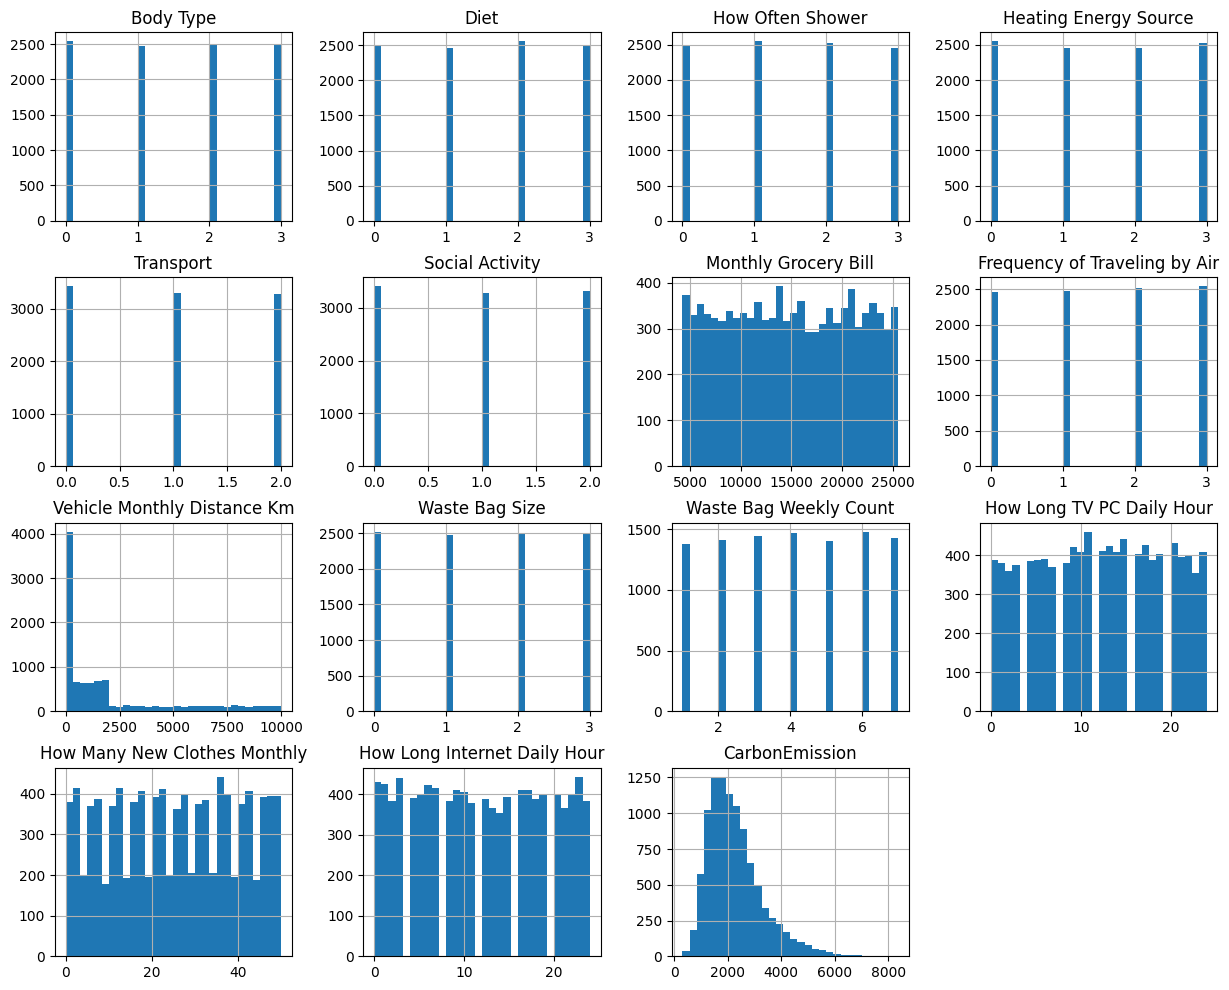

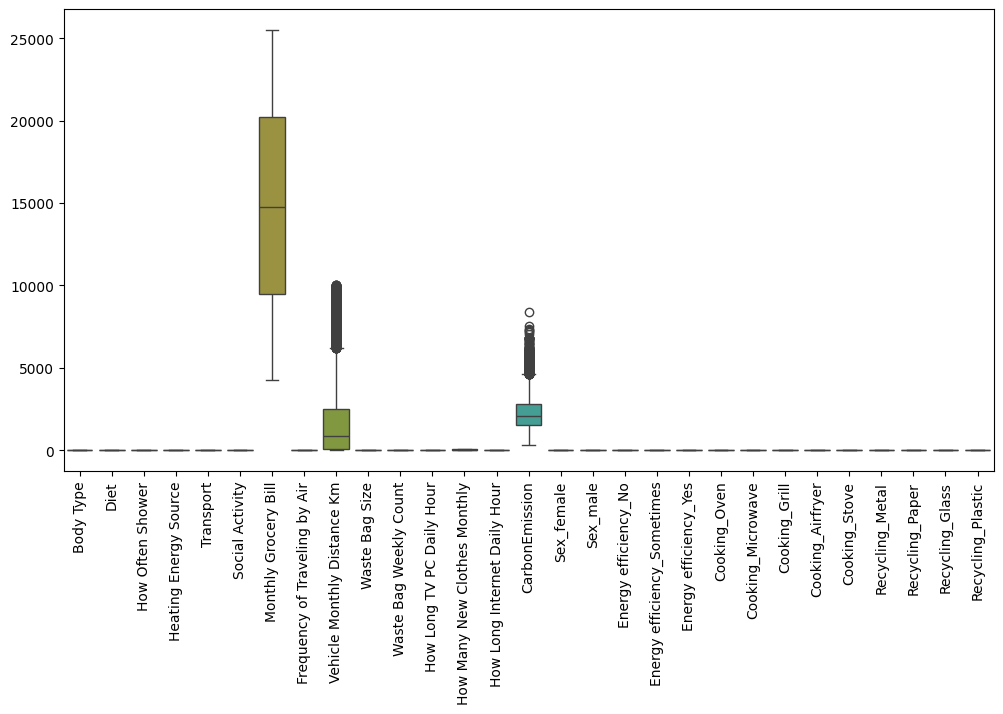

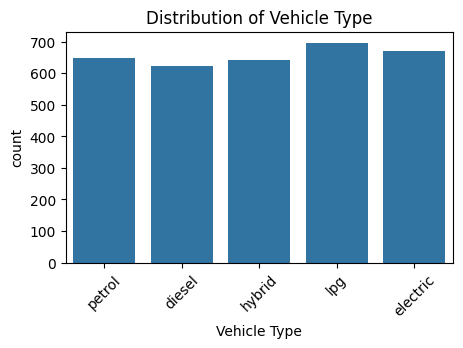

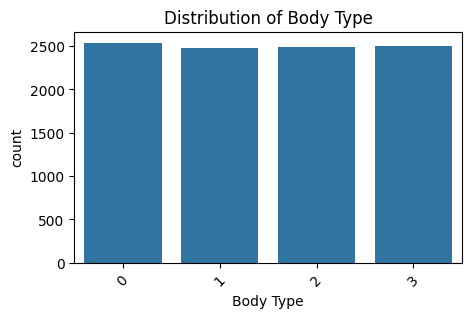

In [13]:
# Histograms for numerical columns
df.hist(figsize=(15, 12), bins=30)
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df_pure)
plt.xticks(rotation=90)
plt.show()

# Count plots for categorical variables
categorical_cols = ['Vehicle Type', 'Body Type']
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


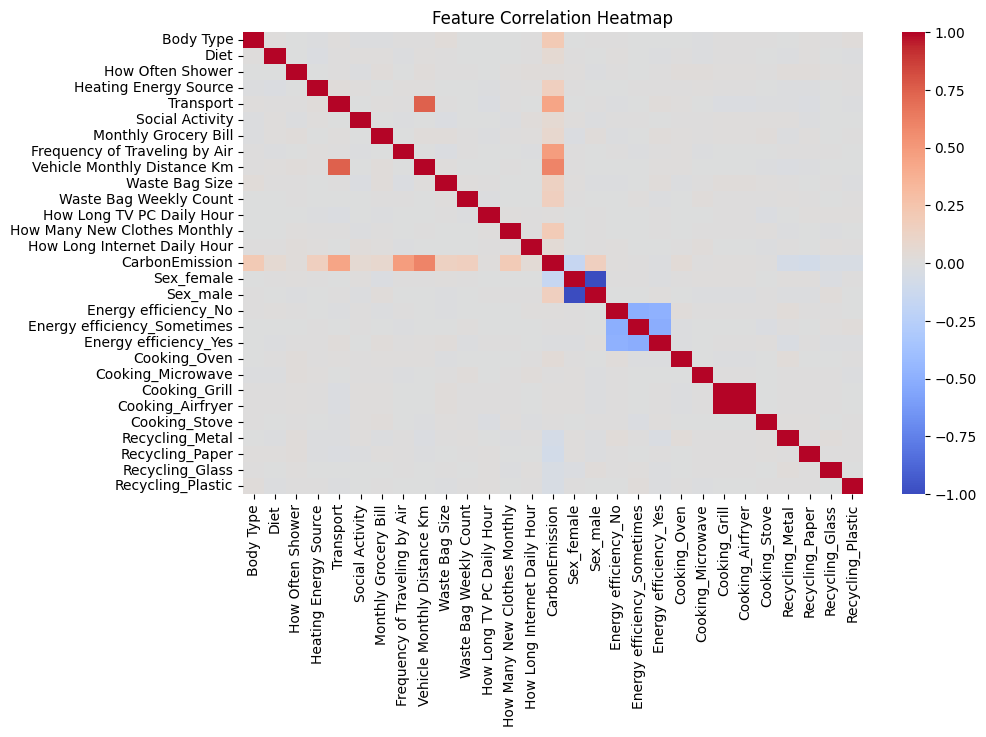

In [14]:
# Check correlation matrix
corr_matrix = df_pure.corr()

# Heatmap to visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
df_pure.to_csv("Updated_Dataset.csv",index=False)

### DEFINING X & Y

In [16]:
X = df_pure.drop(columns=['CarbonEmission'])
y = df_pure['CarbonEmission']

### SPLIT

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2629)

## MODEL SELECTION
Here, we have used the Support Vector Regression Model

In [15]:
model = SVR()

## SCALING

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [27]:
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [28]:
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

{'whiskers': [<matplotlib.lines.Line2D at 0x235017d3b90>,
 'caps': [<matplotlib.lines.Line2D at 0x235017d1d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2350220db80>,
 'medians': [<matplotlib.lines.Line2D at 0x235017d1700>,
 'fliers': [<matplotlib.lines.Line2D at 0x235017d03b0>,
 'means': []}

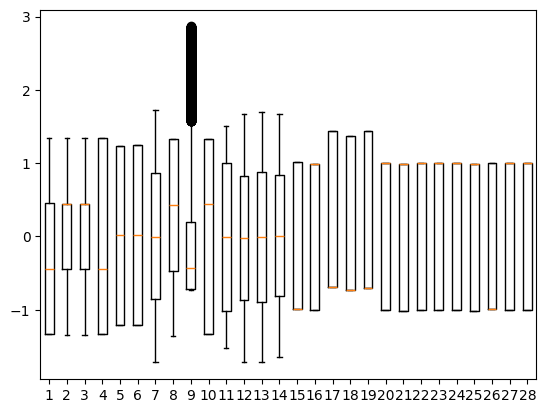

In [29]:
plt.boxplot(X_train_scaled)

## TRAINING MODEL

In [30]:
model.fit(X_train_scaled,y_train_scaled)

C:\Users\hp8cg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## PREDICTION

In [31]:
y_pred_scaled = model.predict(X_test_scaled)

In [32]:
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
# y_pred_original = np.expm1(y_pred)

## EVALUATION

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print("📊 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")
print(f"R² Score: {r2:.4f}") 

📊 Model Evaluation Metrics:
Mean Squared Error (MSE): 204442.51
Root Mean Squared Error (RMSE): 452.15
Mean Absolute Percentage Error (MAPE): 11.29%
R² Score: 0.8037


## BEST FIT LINE

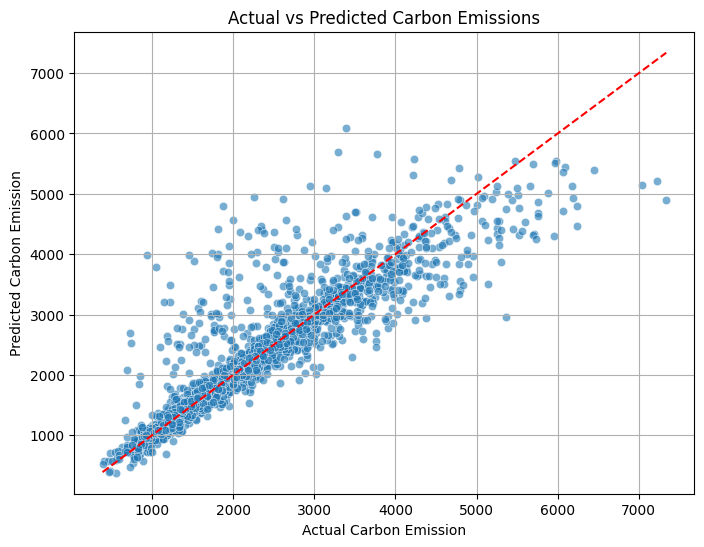

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Actual vs Predicted Carbon Emissions")
plt.grid(True)
plt.show()

In [36]:
df_pure.columns

Index(['Body Type', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission', 'Sex_female', 'Sex_male', 'Energy efficiency_No',
       'Energy efficiency_Sometimes', 'Energy efficiency_Yes', 'Cooking_Oven',
       'Cooking_Microwave', 'Cooking_Grill', 'Cooking_Airfryer',
       'Cooking_Stove', 'Recycling_Metal', 'Recycling_Paper',
       'Recycling_Glass', 'Recycling_Plastic'],
      dtype='object')

In [37]:
df_pure['Monthly Grocery Bill'].unique()

array([19616,  9723, 11770, 13390, 22687, 12281,  4776,  5032, 17058,
       11514, 12452,  9467, 10490, 19190, 18678,  8870, 10746, 24563,
       24051,  5885,  9381, 14072,  5287,  8017, 22090,  5714, 11087,
       22004, 16119, 22345, 23881, 10320, 14840, 14755, 16972,  5458,
        8529, 20469, 20896, 23028, 25075,  7420, 17825, 10575, 23540,
        7676, 11599, 20981, 21578, 23966,  6993,  6226,  8358, 21834,
       24478,  5373, 13475, 20554, 15011, 18252, 22516, 18166, 10661,
       16034, 21407, 24307, 19957,  7761, 10064,  6396, 11428, 17228,
       19019, 12025, 20128,  8102, 21237,  6908, 24819,  5970,  7590,
       16887,  7164, 15522, 23454, 19446, 11940, 19787,  9808, 13305,
       21493, 13816, 12367, 17484, 15181, 24392,  9211,  6482, 18849,
       25160, 15096, 16460, 20299,  8614,  8443,  4264,  6055, 21066,
       18934,  5202, 11684,  5629,  8955,  6823, 17910, 12964, 22175,
       24137, 23625, 17313,  8187, 19872, 12537,  7079,  6567, 21663,
       17655,  7931,

In [38]:
import pickle

# Train your model
# model = ... (your SVM model)
# scaler_x = ...
# scaler_y = ...

# Save properly
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler_x.pkl', 'wb') as f:
    pickle.dump(scaler_x, f)

with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)


In [39]:
X_train.columns

Index(['Body Type', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Sex_female', 'Sex_male', 'Energy efficiency_No',
       'Energy efficiency_Sometimes', 'Energy efficiency_Yes', 'Cooking_Oven',
       'Cooking_Microwave', 'Cooking_Grill', 'Cooking_Airfryer',
       'Cooking_Stove', 'Recycling_Metal', 'Recycling_Paper',
       'Recycling_Glass', 'Recycling_Plastic'],
      dtype='object')